## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  20.370322  1629.778866  0.869415   3.399681  1.438811
1  17.461228   459.451131  0.275071  10.140613  1.547818
2   0.364546  1237.526278  0.991844   1.883780  1.521453
3  44.793528  1400.065943  0.281392   7.472144  1.351552
4  92.821841  1518.016766  0.839804   4.800233  1.481813


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 0.9389678	total: 56.1ms	remaining: 56s
1:	learn: 0.9301431	total: 57.4ms	remaining: 28.6s
2:	learn: 0.9195394	total: 58ms	remaining: 19.3s
3:	learn: 0.9097134	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9019379	total: 59.4ms	remaining: 11.8s
5:	learn: 0.8930622	total: 59.9ms	remaining: 9.93s
6:	learn: 0.8848858	total: 60.5ms	remaining: 8.58s
7:	learn: 0.8747553	total: 61ms	remaining: 7.56s
8:	learn: 0.8645549	total: 62.2ms	remaining: 6.84s
9:	learn: 0.8547154	total: 62.8ms	remaining: 6.21s
10:	learn: 0.8457049	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8360457	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8283746	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8213419	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8121847	total: 65.7ms	remaining: 4.32s
15:	learn: 0.8046095	total: 66.5ms	remaining: 4.09s
16:	learn: 0.7962855	total: 67.4ms	remaining: 3.9s
17:	learn: 0.7880246	total: 68.1ms	remaining: 3.71s
18:	learn: 0.7813282	total: 68.6ms	remaining: 3.54s
19:	learn: 0.7731902	total: 6

218:	learn: 0.2064191	total: 161ms	remaining: 573ms
219:	learn: 0.2058684	total: 161ms	remaining: 571ms
220:	learn: 0.2051706	total: 162ms	remaining: 570ms
221:	learn: 0.2042682	total: 162ms	remaining: 568ms
222:	learn: 0.2036904	total: 163ms	remaining: 567ms
223:	learn: 0.2023988	total: 163ms	remaining: 565ms
224:	learn: 0.2017985	total: 163ms	remaining: 563ms
225:	learn: 0.2007760	total: 164ms	remaining: 561ms
226:	learn: 0.1997196	total: 164ms	remaining: 559ms
227:	learn: 0.1990428	total: 165ms	remaining: 557ms
228:	learn: 0.1984946	total: 165ms	remaining: 556ms
229:	learn: 0.1973462	total: 165ms	remaining: 554ms
230:	learn: 0.1963745	total: 166ms	remaining: 552ms
231:	learn: 0.1959897	total: 166ms	remaining: 551ms
232:	learn: 0.1947295	total: 167ms	remaining: 551ms
233:	learn: 0.1942543	total: 168ms	remaining: 549ms
234:	learn: 0.1930579	total: 168ms	remaining: 548ms
235:	learn: 0.1926119	total: 169ms	remaining: 546ms
236:	learn: 0.1914555	total: 169ms	remaining: 545ms
237:	learn: 

299:	learn: 0.1551211	total: 200ms	remaining: 468ms
300:	learn: 0.1546856	total: 201ms	remaining: 466ms
301:	learn: 0.1539553	total: 201ms	remaining: 465ms
302:	learn: 0.1536907	total: 202ms	remaining: 464ms
303:	learn: 0.1534614	total: 202ms	remaining: 463ms
304:	learn: 0.1531897	total: 203ms	remaining: 463ms
305:	learn: 0.1528974	total: 204ms	remaining: 464ms
306:	learn: 0.1526455	total: 205ms	remaining: 463ms
307:	learn: 0.1523765	total: 205ms	remaining: 462ms
308:	learn: 0.1516613	total: 206ms	remaining: 460ms
309:	learn: 0.1514498	total: 206ms	remaining: 459ms
310:	learn: 0.1511900	total: 207ms	remaining: 458ms
311:	learn: 0.1509305	total: 207ms	remaining: 457ms
312:	learn: 0.1502547	total: 208ms	remaining: 456ms
313:	learn: 0.1500246	total: 208ms	remaining: 454ms
314:	learn: 0.1493552	total: 208ms	remaining: 453ms
315:	learn: 0.1487006	total: 209ms	remaining: 452ms
316:	learn: 0.1480670	total: 209ms	remaining: 451ms
317:	learn: 0.1478587	total: 210ms	remaining: 450ms
318:	learn: 

526:	learn: 0.0849626	total: 310ms	remaining: 278ms
527:	learn: 0.0848161	total: 310ms	remaining: 277ms
528:	learn: 0.0846714	total: 311ms	remaining: 277ms
529:	learn: 0.0845898	total: 311ms	remaining: 276ms
530:	learn: 0.0844469	total: 312ms	remaining: 276ms
531:	learn: 0.0841296	total: 313ms	remaining: 275ms
532:	learn: 0.0839880	total: 313ms	remaining: 274ms
533:	learn: 0.0839080	total: 314ms	remaining: 274ms
534:	learn: 0.0837516	total: 314ms	remaining: 273ms
535:	learn: 0.0836727	total: 315ms	remaining: 272ms
536:	learn: 0.0835185	total: 315ms	remaining: 272ms
537:	learn: 0.0832095	total: 316ms	remaining: 271ms
538:	learn: 0.0829429	total: 316ms	remaining: 270ms
539:	learn: 0.0827918	total: 317ms	remaining: 270ms
540:	learn: 0.0827149	total: 318ms	remaining: 270ms
541:	learn: 0.0825659	total: 319ms	remaining: 269ms
542:	learn: 0.0822654	total: 322ms	remaining: 271ms
543:	learn: 0.0820081	total: 323ms	remaining: 271ms
544:	learn: 0.0816540	total: 323ms	remaining: 270ms
545:	learn: 

601:	learn: 0.0707305	total: 360ms	remaining: 238ms
602:	learn: 0.0705760	total: 361ms	remaining: 237ms
603:	learn: 0.0704553	total: 361ms	remaining: 237ms
604:	learn: 0.0700478	total: 361ms	remaining: 236ms
605:	learn: 0.0698554	total: 362ms	remaining: 235ms
606:	learn: 0.0697124	total: 363ms	remaining: 235ms
607:	learn: 0.0695627	total: 363ms	remaining: 234ms
608:	learn: 0.0693741	total: 364ms	remaining: 233ms
609:	learn: 0.0692225	total: 364ms	remaining: 233ms
610:	learn: 0.0691715	total: 364ms	remaining: 232ms
611:	learn: 0.0690261	total: 365ms	remaining: 232ms
612:	learn: 0.0689767	total: 366ms	remaining: 231ms
613:	learn: 0.0689283	total: 367ms	remaining: 231ms
614:	learn: 0.0685397	total: 368ms	remaining: 230ms
615:	learn: 0.0683999	total: 368ms	remaining: 230ms
616:	learn: 0.0680152	total: 369ms	remaining: 229ms
617:	learn: 0.0678308	total: 369ms	remaining: 228ms
618:	learn: 0.0676500	total: 370ms	remaining: 228ms
619:	learn: 0.0675151	total: 370ms	remaining: 227ms
620:	learn: 

823:	learn: 0.0367101	total: 469ms	remaining: 100ms
824:	learn: 0.0365329	total: 469ms	remaining: 99.5ms
825:	learn: 0.0363686	total: 470ms	remaining: 99ms
826:	learn: 0.0362730	total: 471ms	remaining: 98.5ms
827:	learn: 0.0360772	total: 472ms	remaining: 98ms
828:	learn: 0.0359992	total: 475ms	remaining: 97.9ms
829:	learn: 0.0358397	total: 475ms	remaining: 97.3ms
830:	learn: 0.0356713	total: 476ms	remaining: 96.7ms
831:	learn: 0.0355166	total: 476ms	remaining: 96.1ms
832:	learn: 0.0354232	total: 477ms	remaining: 95.6ms
833:	learn: 0.0352602	total: 478ms	remaining: 95.1ms
834:	learn: 0.0351509	total: 478ms	remaining: 94.5ms
835:	learn: 0.0350766	total: 479ms	remaining: 93.9ms
836:	learn: 0.0349265	total: 479ms	remaining: 93.3ms
837:	learn: 0.0347437	total: 480ms	remaining: 92.7ms
838:	learn: 0.0345648	total: 480ms	remaining: 92.1ms
839:	learn: 0.0344198	total: 481ms	remaining: 91.6ms
840:	learn: 0.0342458	total: 481ms	remaining: 91ms
841:	learn: 0.0341343	total: 482ms	remaining: 90.4ms


862:	learn: 0.0318197	total: 496ms	remaining: 79.5ms
863:	learn: 0.0317696	total: 497ms	remaining: 78.3ms
864:	learn: 0.0316371	total: 498ms	remaining: 77.8ms
865:	learn: 0.0315601	total: 498ms	remaining: 77.2ms
866:	learn: 0.0315451	total: 499ms	remaining: 76.6ms
867:	learn: 0.0314960	total: 499ms	remaining: 76ms
868:	learn: 0.0314208	total: 500ms	remaining: 75.4ms
869:	learn: 0.0314060	total: 502ms	remaining: 75.1ms
870:	learn: 0.0313579	total: 503ms	remaining: 74.5ms
871:	learn: 0.0312400	total: 503ms	remaining: 73.9ms
872:	learn: 0.0311668	total: 504ms	remaining: 73.3ms
873:	learn: 0.0311524	total: 504ms	remaining: 72.7ms
874:	learn: 0.0310805	total: 504ms	remaining: 72.2ms
875:	learn: 0.0310335	total: 505ms	remaining: 71.6ms
876:	learn: 0.0310193	total: 505ms	remaining: 71ms
877:	learn: 0.0308749	total: 506ms	remaining: 70.4ms
878:	learn: 0.0308050	total: 506ms	remaining: 69.8ms
879:	learn: 0.0307219	total: 507ms	remaining: 69.2ms
880:	learn: 0.0306279	total: 507ms	remaining: 68.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4809820343601718


ABC Pre-generator MAE 0.47313290269702835


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

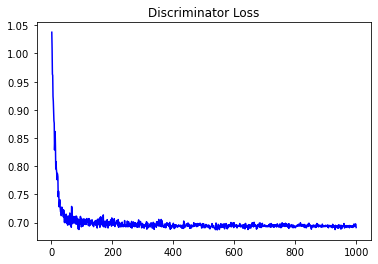

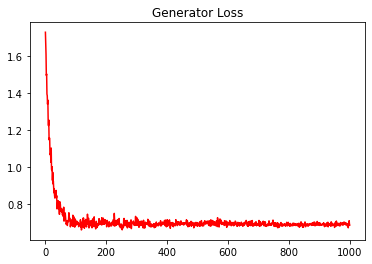

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.8804909526826814


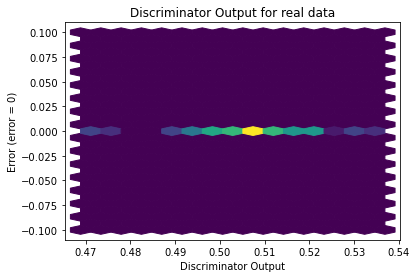

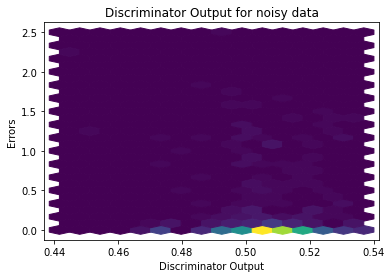

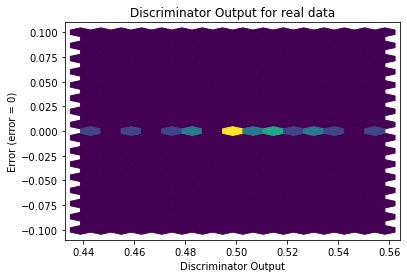

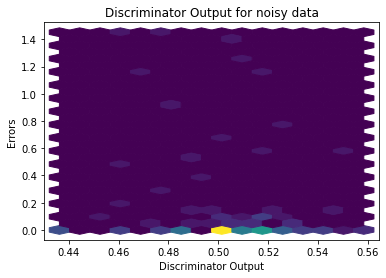

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

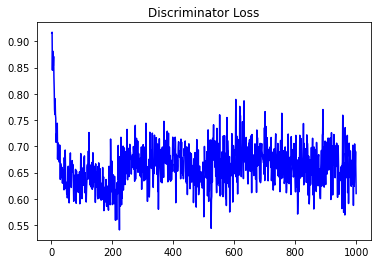

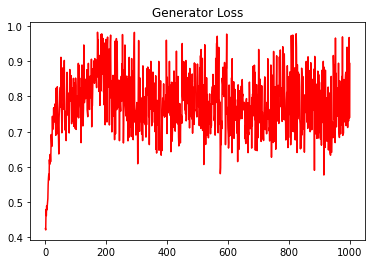

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.003627244914882


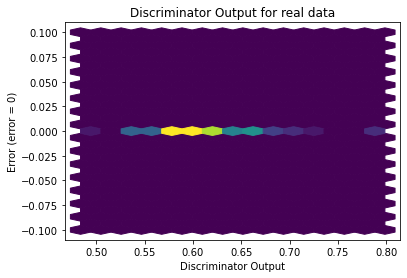

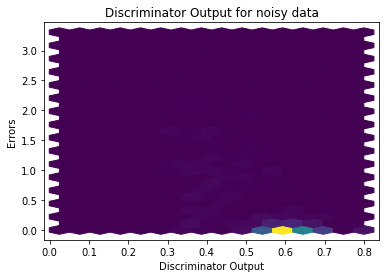

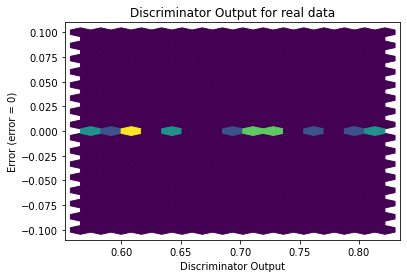

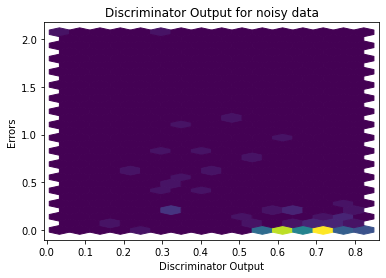

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


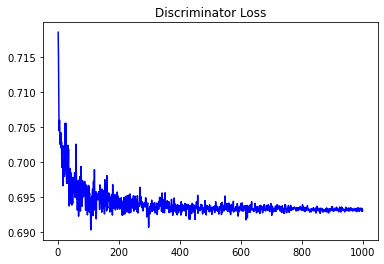

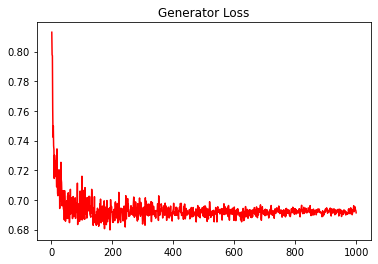

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4855429314477369


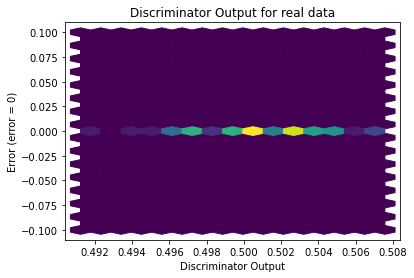

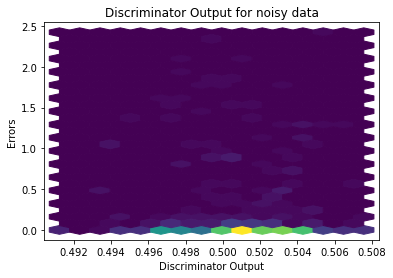

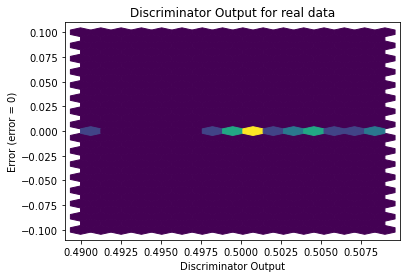

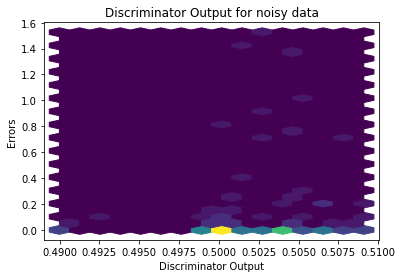

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


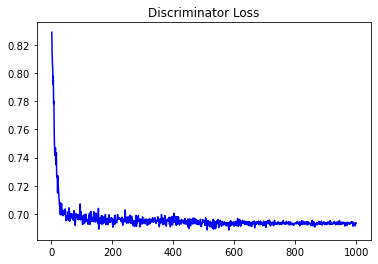

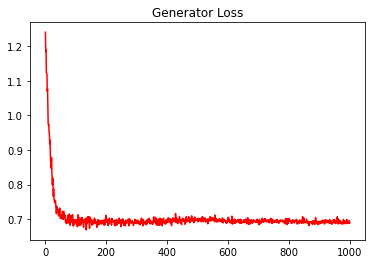

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.49271707122819497


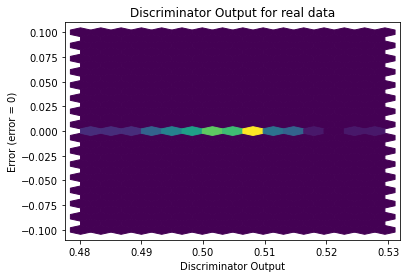

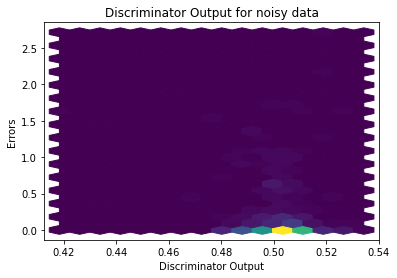

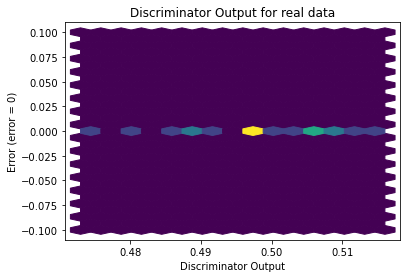

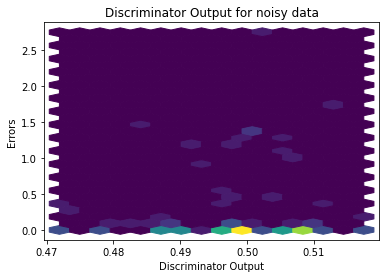

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0618]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0044]], requires_grad=True)
